<a href="https://colab.research.google.com/github/NikiforovSaveliy/pyad-2024/blob/main/lab1/PY%D0%90%D0%94_%D0%9B%D0%A01_PySpark_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Данные

Об авиаперевозках с 1987 года: https://www.transtats.bts.gov/Tables.asp?QO_VQ=EFD&QO_anzr=Nv4yv0r%FDb0-gvzr%FDcr4s14zn0pr%FDQn6n&QO_fu146_anzr=b0-gvzr

Ниже скачиваются только данные за часть 2023 и 2024 годов.

In [3]:
!gdown 1NQuold7jvGZfHikbvtj0QynbhM90pT8L
!gdown 1HNAGhPHE6BmamcI0D767-BFhF4BWs6Hh
!gdown 1ERgltJRuybLl7sIUUVckzpUVzyP1ttCq
!gdown 1XrUk6ZYwQLQTjtsMHKxzzERP4dCLMEao
!gdown 1qy95Qpd93VClYPethMtMDJdAMBl21fnW
!gdown 1js5pbc_xe6kP7W4_lp6HaeXR0oAw2ZDL
!gdown 1qb4_uKGy0KU_4jRzaauqeObaaCQMtdBZ
!gdown 1TuC71TgrJDgpOvQVKl9jn89fAr9El1Pa
!gdown 1nt7e9Pszf2-IB3GsKHNRHZ_SPzxS0E2L
!gdown 1V5tCiD9jRCss0KoJxk-r1zOCw3onwez3
!gdown 1WsKGiVBV2p-sgiDePT6HZKUezWPc2zUH

Downloading...
From: https://drive.google.com/uc?id=1NQuold7jvGZfHikbvtj0QynbhM90pT8L
To: /content/T_ONTIME_REPORTING.csv
100% 67.6M/67.6M [00:00<00:00, 117MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HNAGhPHE6BmamcI0D767-BFhF4BWs6Hh
To: /content/T_ONTIME_REPORTING 2.csv
100% 66.4M/66.4M [00:00<00:00, 216MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ERgltJRuybLl7sIUUVckzpUVzyP1ttCq
To: /content/T_ONTIME_REPORTING 3.csv
100% 61.6M/61.6M [00:00<00:00, 68.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XrUk6ZYwQLQTjtsMHKxzzERP4dCLMEao
To: /content/T_ONTIME_REPORTING 4.csv
100% 71.8M/71.8M [00:00<00:00, 147MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qy95Qpd93VClYPethMtMDJdAMBl21fnW
To: /content/T_ONTIME_REPORTING 5.csv
100% 69.3M/69.3M [00:00<00:00, 164MB/s]
Downloading...
From: https://drive.google.com/uc?id=1js5pbc_xe6kP7W4_lp6HaeXR0oAw2ZDL
To: /content/T_ONTIME_REPORTING 6.csv
100% 71.1M/71.1M [00:00<00:00, 75.3MB/s]
Downloading...
F

#### Основные функции PySpark

В отдельном колабе: https://colab.research.google.com/drive/1noKypPI5ymbofp0YPtRH9gYSqNPAiTAT?usp=sharing

### Пример работы с PySpark
Для работы с PySpark мы можем использовать SparkSession для создания сессии и работы с большими данными.

In [4]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.5.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.5.tgz
!tar xf spark-3.5.3-bin-hadoop3.5.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()

spark

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,665 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,105 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu 

In [5]:
df = spark.read.csv('/content/T_ONTIME_REPORTING.csv', header=True, inferSchema=True)
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 2.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 3.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 4.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 5.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 6.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 7.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 8.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 9.csv', header=True, inferSchema=True))
df = df.union(spark.read.csv('/content/T_ONTIME_REPORTING 10.csv', header=True, inferSchema=True))

df.show()

+----+--------------------+-----------------+-----------------+------+--------------------+---------------+----+--------------------+---------+---------+---------+-------------------+--------+-------------+-------------+---------+--------------+-------------------+
|YEAR|             FL_DATE|OP_UNIQUE_CARRIER|ORIGIN_AIRPORT_ID|ORIGIN|    ORIGIN_CITY_NAME|DEST_AIRPORT_ID|DEST|      DEST_CITY_NAME|DEP_DELAY|ARR_DELAY|CANCELLED|ACTUAL_ELAPSED_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|
+----+--------------------+-----------------+-----------------+------+--------------------+---------------+----+--------------------+---------+---------+---------+-------------------+--------+-------------+-------------+---------+--------------+-------------------+
|2024|1/1/2024 12:00:00 AM|               9E|            10135|   ABE|Allentown/Bethleh...|          10397| ATL|         Atlanta, GA|     -2.0|    -35.0|      0.0|              119.0|   692.0|         N

## Задание 1

1. Сколько различных перевозчиков представлено в датасете?
2. Какие 5 перевозчиков сделали наибольшее число перелетов?

Могут понадобиться методы:
- dropDuplicates()
- select()
- groupBy()
- orderBy()
- limit()
- count()

In [5]:
unique_cariers = df.select("OP_UNIQUE_CARRIER").distinct()
print("Уникальны перевозчики")
unique_cariers.show()


Уникальны перевозчики
+-----------------+
|OP_UNIQUE_CARRIER|
+-----------------+
|               UA|
|               NK|
|               AA|
|               B6|
|               DL|
|               OO|
|               F9|
|               MQ|
|               OH|
|               HA|
|               G4|
|               YX|
|               AS|
|               WN|
|               9E|
+-----------------+



In [6]:
counted_unique_carriers = df.where("CANCELLED == 0.0").groupBy("OP_UNIQUE_CARRIER").count().orderBy("count", ascending=False).limit(5)
print("5 первозчиков с набольшим количеством перелетов")
counted_unique_carriers.show()

5 первозчиков с набольшим количеством перелетов
+-----------------+-------+
|OP_UNIQUE_CARRIER|  count|
+-----------------+-------+
|               WN|1163485|
|               DL| 801283|
|               AA| 774037|
|               UA| 588722|
|               OO| 547194|
+-----------------+-------+



## Задание 2

Найдите 10 самых частых направлений, если:
- Направление – это пара «аэропорт вылета-аэропорт прилета»
- Направление – это пара «город вылета-город прилета»
- Направление – это город прилета.


Могут понадобиться методы:
- groupBy()
- orderBy()
- limit()
- count()

In [24]:
origin_dest_direction = df.select("ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID").groupBy("ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID").count().orderBy("count", ascending=False).limit(10)
print("10 самых частых направлений <<Аэропорт вылета - аэропорт прилета>>")
origin_dest_direction.show()

10 самых частых направлений <<Аэропорт вылета - аэропорт прилета>>
+-----------------+---------------+-----+
|ORIGIN_AIRPORT_ID|DEST_AIRPORT_ID|count|
+-----------------+---------------+-----+
|            13830|          12173|10504|
|            12173|          13830|10487|
|            14771|          12892| 9631|
|            12892|          14771| 9631|
|            12892|          12889| 8739|
|            12889|          12892| 8715|
|            12953|          13930| 8432|
|            13930|          12953| 8432|
|            11278|          10721| 8306|
|            10721|          11278| 8305|
+-----------------+---------------+-----+



In [25]:
origin_dest_direction = df.select("ORIGIN_CITY_NAME", "DEST_CITY_NAME").groupBy("ORIGIN_CITY_NAME", "DEST_CITY_NAME").count().orderBy("count", ascending=False).limit(10)
print("10 самых частых направлений <<город вылета - город прилета>>")
origin_dest_direction.show()

10 самых частых направлений <<город вылета - город прилета>>
+-----------------+-----------------+-----+
| ORIGIN_CITY_NAME|   DEST_CITY_NAME|count|
+-----------------+-----------------+-----+
|      Chicago, IL|     New York, NY|12856|
|     New York, NY|      Chicago, IL|12855|
|       Boston, MA|     New York, NY|12337|
|     New York, NY|       Boston, MA|12318|
|      Kahului, HI|     Honolulu, HI|10504|
|     Honolulu, HI|      Kahului, HI|10487|
|        Miami, FL|     New York, NY| 9711|
|     New York, NY|        Miami, FL| 9709|
|  Los Angeles, CA|San Francisco, CA| 9631|
|San Francisco, CA|  Los Angeles, CA| 9631|
+-----------------+-----------------+-----+



In [26]:
origin_dest_direction = df.select("DEST_CITY_NAME").groupBy("DEST_CITY_NAME").count().orderBy("count", ascending=False).limit(10)
print("10 самых частых направлений <<город прилета>>")
origin_dest_direction.show()

10 самых частых направлений <<город прилета>>
+--------------------+------+
|      DEST_CITY_NAME| count|
+--------------------+------+
|         Chicago, IL|282723|
|         Atlanta, GA|277089|
|        New York, NY|247223|
|          Denver, CO|237001|
|Dallas/Fort Worth...|234809|
|       Charlotte, NC|161726|
|     Los Angeles, CA|160652|
|      Washington, DC|157883|
|       Las Vegas, NV|156322|
|         Phoenix, AZ|150906|
+--------------------+------+



## Задание 3

1. Узнайте, сколько было отмен рейсов в каждом месяце. Отсортируйте ответ по числу отмен.
2. Для каждого месяца определите причину задержки, из-за которой было отложено больше всего рейсов.

Могут понадобиться методы/функции:
- withColumn()
- split()
- getItem()
- cast()
- groupBy()
- orderBy()
- sum()
- isNotNull()
- col()
- when()
- otherwise()
- agg()
- greatest()

In [7]:
from pyspark.sql.functions import split, when, col, greatest, month, to_date, to_timestamp

cancelled = df.select("FL_DATE")\
.where("CANCELLED = 1.0")\
.withColumn("FL_DATE", to_timestamp("FL_DATE", "M/d/yyyy h:mm:ss a"))\
.withColumn("MONTH", month("FL_DATE"))\
.groupBy("MONTH")\
.count()\
.orderBy("count", ascending=False)

print("Количетсво отмен по месяцам")
cancelled.show()

Количетсво отмен по месяцам
+-----+-----+
|MONTH|count|
+-----+-----+
|    1|30684|
|    7|14606|
|    6|12219|
|    4| 9589|
|    8| 9172|
|    2| 9019|
|    3| 7406|
|    5| 3310|
|   11|  819|
+-----+-----+



Согласно описанию столбцов с источнику [данных](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGK)
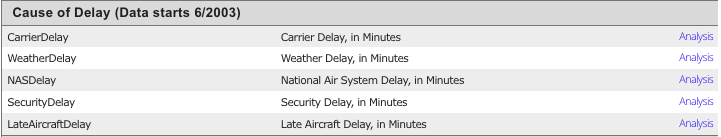

In [8]:
from pyspark.sql import functions as F

df_filtered = df.filter((df["CANCELLED"] == 0) & (df["ARR_DELAY"] > 0))


df_with_month = df_filtered\
.withColumn("FL_DATE", to_timestamp("FL_DATE", "M/d/yyyy h:mm:ss a"))\
.withColumn("MONTH", F.month("FL_DATE"))

delay_types = ["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]

df_delays_by_month = (
    df_with_month
    .groupBy("MONTH")
    .agg(
        *[F.sum(col).alias(col) for col in delay_types]
    )
)

df_result = (
    df_delays_by_month
    .withColumn("MAX_DELAY_REASON",
                F.when(F.col("CARRIER_DELAY") == F.greatest(*[F.col(col) for col in delay_types]), "CARRIER_DELAY")
                .when(F.col("WEATHER_DELAY") == F.greatest(*[F.col(col) for col in delay_types]), "WEATHER_DELAY")
                .when(F.col("NAS_DELAY") == F.greatest(*[F.col(col) for col in delay_types]), "NAS_DELAY")
                .when(F.col("SECURITY_DELAY") == F.greatest(*[F.col(col) for col in delay_types]), "SECURITY_DELAY")
                .when(F.col("LATE_AIRCRAFT_DELAY") == F.greatest(*[F.col(col) for col in delay_types]), "LATE_AIRCRAFT_DELAY"))
    .select("MONTH", "MAX_DELAY_REASON")
)

df_result.show()

+-----+-------------------+
|MONTH|   MAX_DELAY_REASON|
+-----+-------------------+
|    1|LATE_AIRCRAFT_DELAY|
|    2|      CARRIER_DELAY|
|    3|LATE_AIRCRAFT_DELAY|
|    4|LATE_AIRCRAFT_DELAY|
|    5|LATE_AIRCRAFT_DELAY|
|    6|LATE_AIRCRAFT_DELAY|
|    7|LATE_AIRCRAFT_DELAY|
|    8|LATE_AIRCRAFT_DELAY|
|   11|      CARRIER_DELAY|
+-----+-------------------+



## Задание 4

Создайте и обучите модель логистической регрессии для предсказания отмены рейса.

Закодируйте категориальные признаки в one-hot формат: разбейте столбец из $n$ категорий на $n$ столбцов, где в каждой строке $1$ будет стоять в том столбце, название которого раньше было категорией, к которой относится этот объект.

Сначала закодируем таким образом столбец с перевозчиком (`OP_UNIQUE_CARRIER`).

In [9]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

carr_indexer = StringIndexer(inputCol="OP_UNIQUE_CARRIER", outputCol="carrier_index")
carr_encoder = OneHotEncoder(inputCol="carrier_index", outputCol="carrier_fact")

Столбцы `ORIGIN` (пункт вылета) и `DEST` (пункт прилета) закодируйте аналогично самостоятельно.

In [11]:
origin_indexer = StringIndexer(inputCol="ORIGIN", outputCol="origin_index")
origin_encoder = OneHotEncoder(inputCol="origin_index", outputCol="origin_fact")

In [10]:
dest_indexer = StringIndexer(inputCol="DEST", outputCol="dest_index")
dest_encoder = OneHotEncoder(inputCol="dest_index", outputCol="dest_fact")

Выделите целевую переменную. Ее важно назвать `label`. По этому названию дальше метод `fit()` отличит ее от других столбцов. Целевая переменная должна получиться из значений столбца `CANCELLED` (отмена рейса).

In [34]:
from pyspark.sql.functions import to_unix_timestamp

df3 = df.withColumn("label", col("CANCELLED")).withColumn("DATE", to_timestamp("FL_DATE", "M/d/yyyy h:mm:ss a").cast("int"))

Соберите все признаки, которые будут использоваться для обучения, в один вектор `features`.

In [35]:
from pyspark.ml.feature import VectorAssembler

vec_assembler = VectorAssembler(inputCols=["DATE", "DISTANCE", "carrier_fact", "dest_fact", "origin_fact"], outputCol="features")

Объедините все предобработки в один пайплайн. Он будет состоять из кодирования категориальных переменных и объединения новых столбцов с некоторыми старыми в матрицу признаков.

In [36]:
from pyspark.ml import Pipeline

flights_pipe = Pipeline(stages=[dest_indexer, dest_encoder, carr_indexer, carr_encoder, origin_indexer, origin_encoder, vec_assembler])

Выполните созданный пайплайн.

In [37]:
piped_data = flights_pipe.fit(df3).transform(df3)

Разделите датасет на тренировочную и тестовую выборки.

In [38]:
training, test = piped_data.randomSplit([.7, .3])

Создайте модель – логистическую регрессию.

In [39]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression()

Введите метрику оценки качества предсказания – ROC-AUC. Метрика рассчитывается на основе матрицы неточностей. Чем ближе она к 1, тем качественнее классификатор. Значение 0.5 означает, что предсказания случайны.

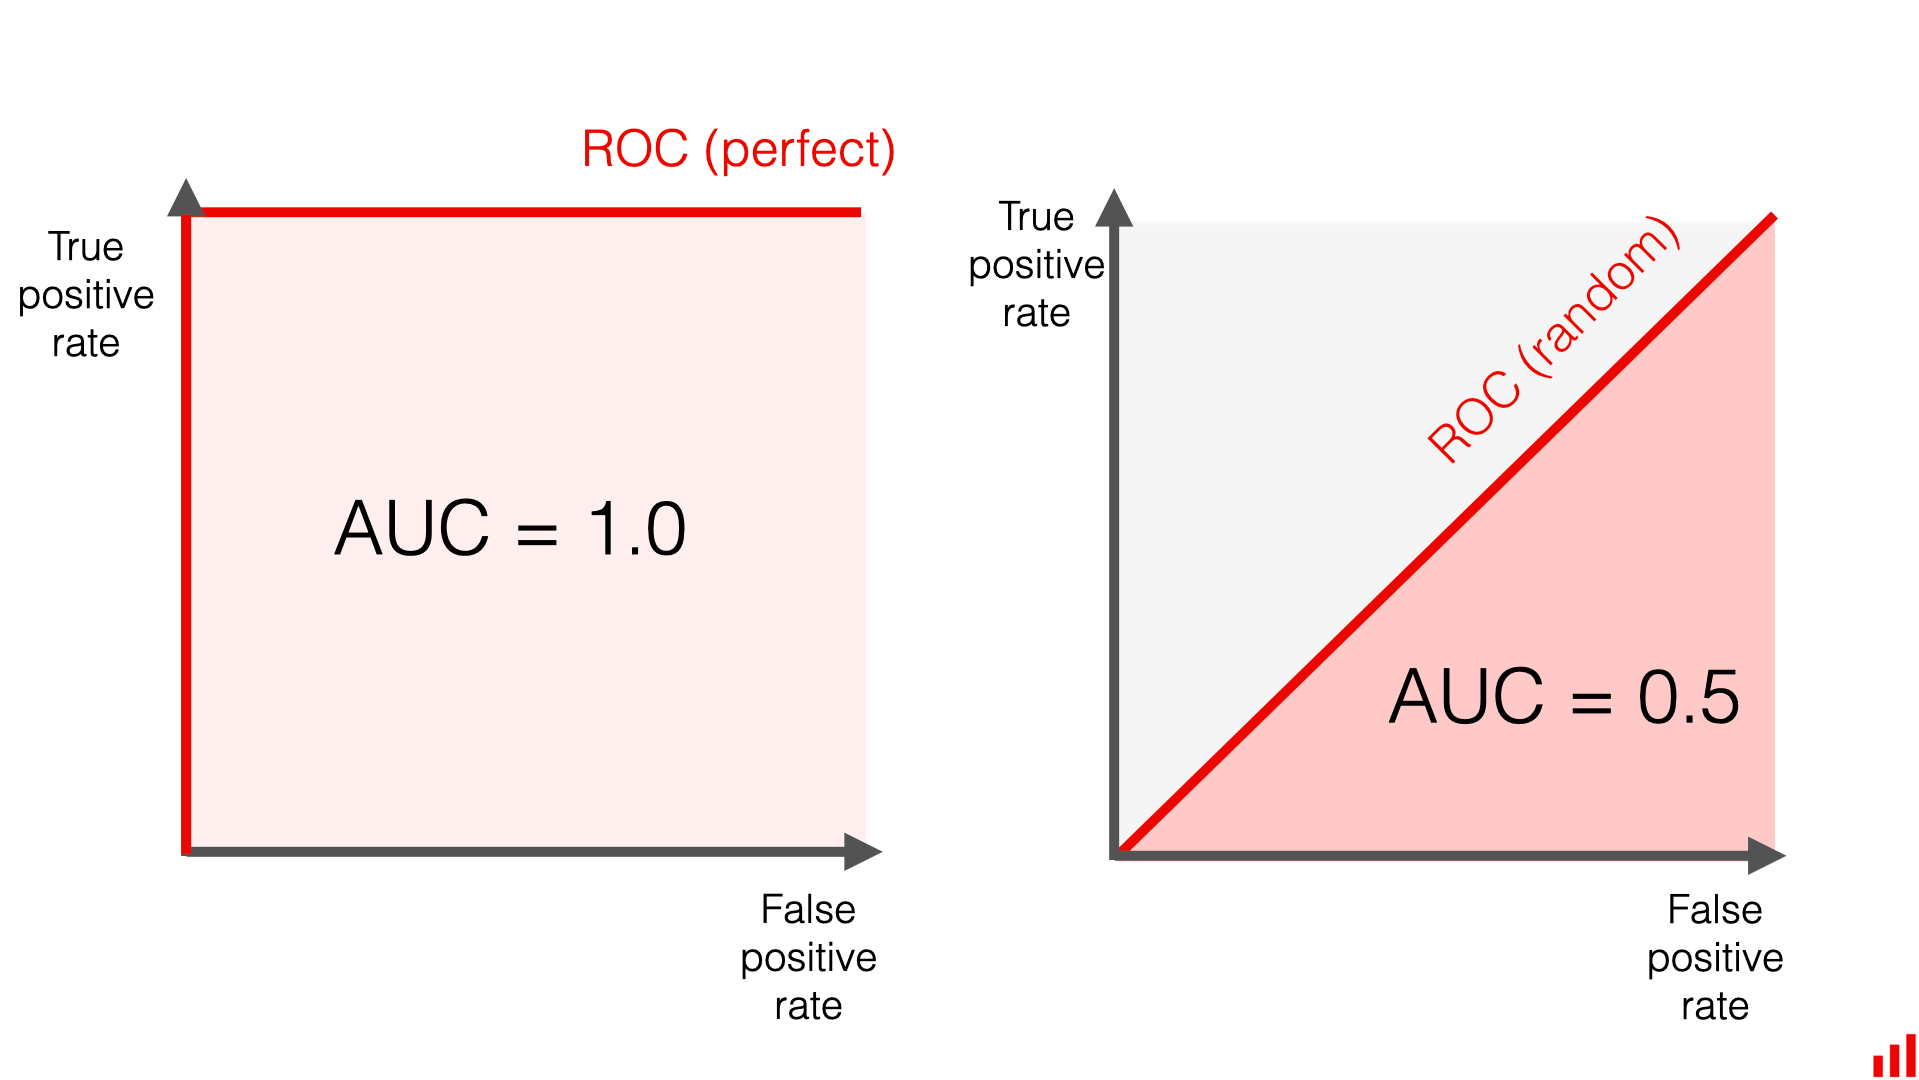

In [40]:
import pyspark.ml.evaluation as evals

evaluator = evals.BinaryClassificationEvaluator(metricName="areaUnderROC")

Обучите модель.

In [ ]:
model = lr.fit(training)
print(model)

Протестируйте модель.

In [ ]:
test_results = model.transform(test)
print(evaluator.evaluate(test_results))

Точность классификатора – чуть меньше 0.7. Результат посредственный. Проведите несколько экспериментов с предобработкой и ответьте на следующие вопросы:
1. Повысится ли качество, если не использовать данные о пункте вылета?
2. Повысится ли качество, если не использовать данные о пункте прилета?
3. Повысится ли качество, если не использовать данные о перевозчике?
4. Повысится ли качество, если не использовать данные о месяце перелета?
5. Повысится ли качество, если задать направление полета иначе (см. задание 2)?

In [ ]:
# put your code here